In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Baca dataset
dataset = pd.read_csv('waterQuality1.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [18]:
dataset

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [19]:
# Ganti nilai '#NUM!'
dataset['is_safe'] = dataset['is_safe'].replace('#NUM!', 0)

# Ubah tipe data menjadi float
dataset['is_safe'] = dataset['is_safe'].astype(float)
dataset['is_safe'].value_counts()

is_safe
0.0    7087
1.0     912
Name: count, dtype: int64

In [20]:
# Mengonversi kolom objek ke int atau float
dataset['ammonia'] = dataset['ammonia'].astype('category').cat.codes
dataset['is_safe'] = dataset['is_safe'].astype('category').cat.codes

# pisahkan variable dependen dan independent
x = dataset.iloc[:,1:20]
y = dataset.iloc[:,20]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   int16  
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [21]:
# Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
# Normalisasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Buat objek KNN
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Latih model KNN
knn_classifier.fit(x_train, y_train)

# Lakukan prediksi
y_pred = knn_classifier.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.868125
Precision: 0.868125
Recall: 0.868125
F1 Score: 0.868125


In [24]:
testing_df =pd.read_csv('databaru.csv')
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    20 non-null     float64
 1   ammonia      20 non-null     float64
 2   arsenic      20 non-null     float64
 3   barium       20 non-null     float64
 4   cadmium      20 non-null     float64
 5   chloramine   20 non-null     float64
 6   chromium     20 non-null     float64
 7   copper       20 non-null     float64
 8   flouride     20 non-null     float64
 9   bacteria     20 non-null     float64
 10  viruses      20 non-null     float64
 11  lead         20 non-null     float64
 12  nitrates     20 non-null     float64
 13  nitrites     20 non-null     float64
 14  mercury      20 non-null     float64
 15  perchlorate  20 non-null     float64
 16  radium       20 non-null     float64
 17  selenium     20 non-null     float64
 18  silver       20 non-null     float64
 19  uranium   

In [25]:
testing_df['is_safe'] = 0
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    20 non-null     float64
 1   ammonia      20 non-null     float64
 2   arsenic      20 non-null     float64
 3   barium       20 non-null     float64
 4   cadmium      20 non-null     float64
 5   chloramine   20 non-null     float64
 6   chromium     20 non-null     float64
 7   copper       20 non-null     float64
 8   flouride     20 non-null     float64
 9   bacteria     20 non-null     float64
 10  viruses      20 non-null     float64
 11  lead         20 non-null     float64
 12  nitrates     20 non-null     float64
 13  nitrites     20 non-null     float64
 14  mercury      20 non-null     float64
 15  perchlorate  20 non-null     float64
 16  radium       20 non-null     float64
 17  selenium     20 non-null     float64
 18  silver       20 non-null     float64
 19  uranium   

In [26]:
# Pisahkan variabel independen
x_testing = testing_df.iloc[:, 1:20]

# Normalisasi fitur pada data baru
x_testing = scaler.transform(x_testing)

# Lakukan prediksi pada data baru
y_pred_testing = knn_classifier.predict(x_testing)

# Tambahkan hasil prediksi ke dalam kolom is_safe pada dataframe
testing_df['is_safe'] = y_pred_testing

In [27]:
# Menampilkan hasil prediksi
for i, row in testing_df.iterrows():
    if row['is_safe'] == 1:
        print(f"data ke {i + 1} memiliki kandungan air aman")
    else:
        print(f"data ke {i + 1} memiliki kandungan air tidak aman")


data ke 1 memiliki kandungan air tidak aman
data ke 2 memiliki kandungan air tidak aman
data ke 3 memiliki kandungan air tidak aman
data ke 4 memiliki kandungan air tidak aman
data ke 5 memiliki kandungan air aman
data ke 6 memiliki kandungan air tidak aman
data ke 7 memiliki kandungan air tidak aman
data ke 8 memiliki kandungan air tidak aman
data ke 9 memiliki kandungan air tidak aman
data ke 10 memiliki kandungan air tidak aman
data ke 11 memiliki kandungan air tidak aman
data ke 12 memiliki kandungan air aman
data ke 13 memiliki kandungan air tidak aman
data ke 14 memiliki kandungan air aman
data ke 15 memiliki kandungan air tidak aman
data ke 16 memiliki kandungan air tidak aman
data ke 17 memiliki kandungan air tidak aman
data ke 18 memiliki kandungan air tidak aman
data ke 19 memiliki kandungan air tidak aman
data ke 20 memiliki kandungan air tidak aman


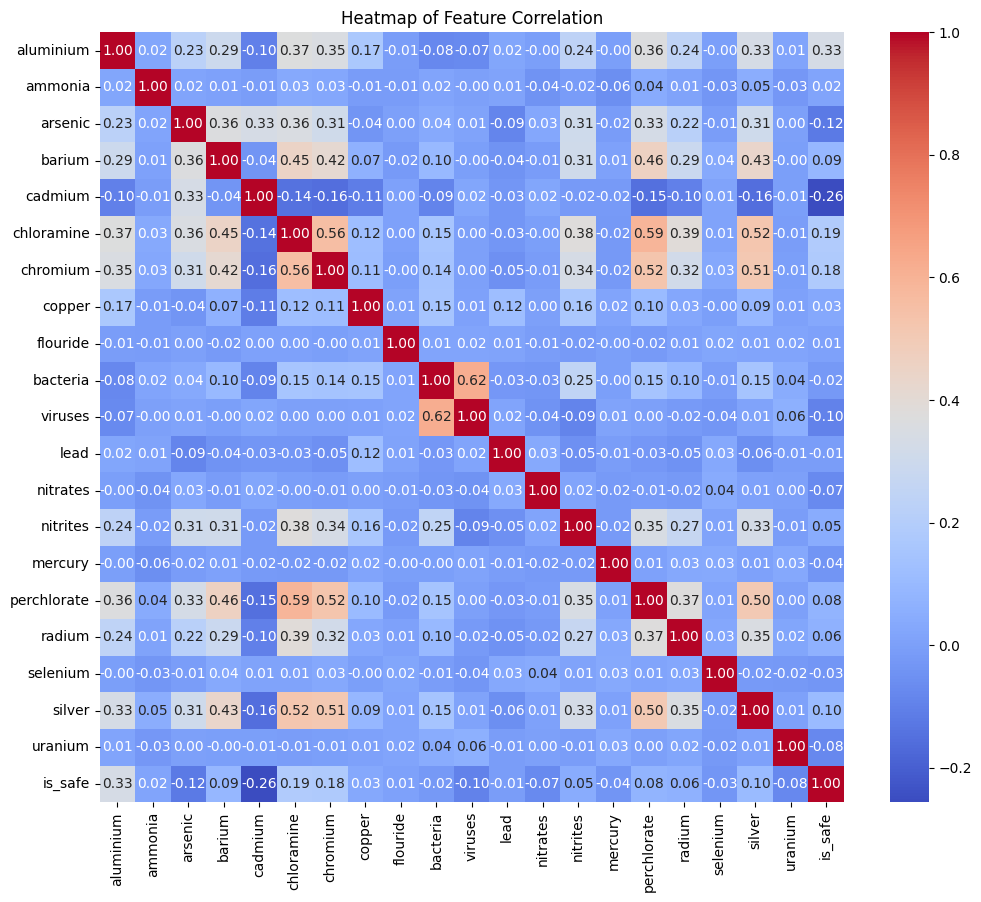

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung matriks korelasi
correlation_matrix = dataset.corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlation')
plt.show()

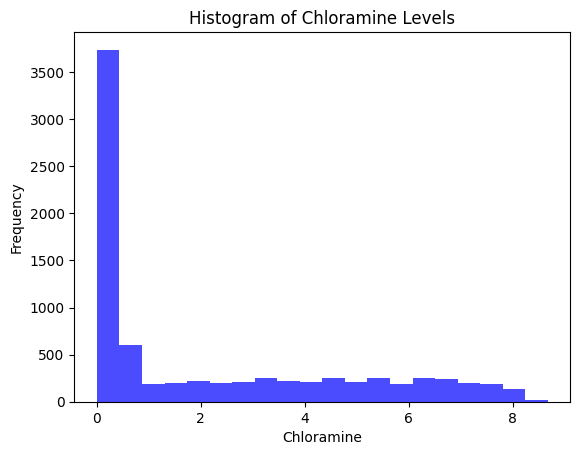

In [29]:
# Contoh histogram untuk satu fitur
plt.hist(dataset['chloramine'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Chloramine Levels')
plt.xlabel('Chloramine')
plt.ylabel('Frequency')
plt.show()

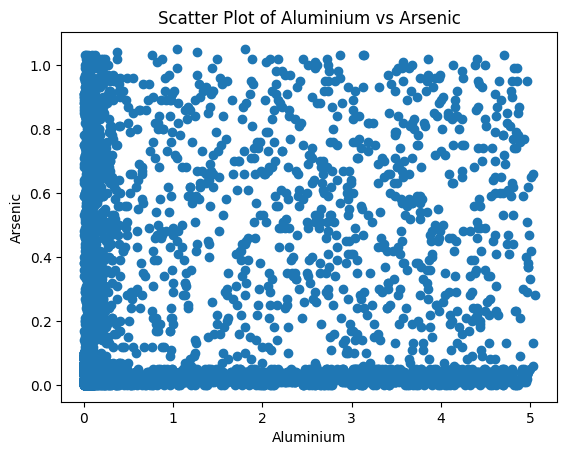

In [30]:
# Contoh penyebaran data untuk dua fitur tertentu
plt.scatter(dataset['aluminium'], dataset['arsenic'])
plt.title('Scatter Plot of Aluminium vs Arsenic')
plt.xlabel('Aluminium')
plt.ylabel('Arsenic')
plt.show()